# Online Store Analysis

You are an analyst in a large online store. You and your marketing team have compiled a list of hypotheses to help increase revenue.

<b>Objective:</b>
   1. Prioritize hypotheses, run *A/B testing*, and analyze the results.

<b>Stages:</b><a id='back'></a>

1. [Data Overview](#Start)
    - [hypotheses_us dataset](#first)
    - [orders_us dataset](#second)
    - [visits_us dataset](#third)
2. [Data Pre-processing](#Pre-processing)
    - [df_hyp dataset](#first1)
    - [df_orders dataset](#second2)
3. [*Exploratory Data Analysis*](#EDA)
    - [Prioritizing the hypothesis](#1)
    - [A/B testing analysis](#2)
        - [Dataset preparation](#2.1)
        - [Cumulative metric stability analysis process](#2.2)
        - [Analyze and fix outliers](#2.3)
4. [Hypothesis Test](#Test)
    - [Statistical significance of conversion differences between groups (raw data)](#h1)
    - [Statistical significance of difference in mean order size between groups (raw data)](#h2)
    - [Statistical significance of conversion differences between groups (filtered data)](#h3)
    - [Statistical significance of difference in mean order size between groups (filtered data)](#h4)
5. [General Conclusion](#Conclusion)

## Data Overview <a id="Start"></a>

In [1]:
# Load all libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

### hypotheses_us dataset <a id="first"></a>

In [2]:
# Dataset
df_hyp = pd.read_csv('Y:\\Online Course\\Practicum\\Jupyter Notebook\\8 Project\\hypotheses_us.csv', sep=';')

In [3]:
# General information
df_hyp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
# Dataset size
df_hyp.shape

(9, 5)

In [5]:
# Sample data
df_hyp.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


Documentation:
- `Hypotheses`  - a brief description of the hypothesis
- `Reach` - user's range, on a scale of one to ten
- `Impact`  - the impact on users, on a scale of one to ten
- `Confidence` - belief in a hypothesis, on a scale of one to ten
- `Effort` - the resources needed to test a hypothesis, on a scale of one to ten. The higher the `Effort` value, the more resource intensive the test is.

In [6]:
# Checking for duplicates
df_hyp.duplicated().sum()

0

The column names in this dataset need to be changed to *lower case*.

[Back to stages](#back)

### orders_us dataset <a id="second"></a>

In [7]:
# Dataset
df_orders = pd.read_csv(
    'Y:\\Online Course\\Practicum\\Jupyter Notebook\\8 Project\\orders_us.csv',
    parse_dates=['date']
)

In [8]:
# General information
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [9]:
# Dataset size
df_orders.shape

(1197, 5)

In [10]:
# Sample data
df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


Documentation:
- `transactionId`  - order ID
- `visitorId`  - ID of the user who made the order
- `date` - the date the order was made
- `revenue`  - income from orders
- `group` - A/B test group (*test group*) to which the user belongs

In [11]:
# Checking for duplicates
df_orders.duplicated().sum()

0

The column names in this dataset also need to be changed to lower case.

[Back to stages](#back)

### visits_us dataset <a id="third"></a>

In [12]:
# Dataset
df_visits = pd.read_csv(
    'Y:\\Online Course\\Practicum\\Jupyter Notebook\\8 Project\\visits_us.csv',
    parse_dates=['date']
)

In [13]:
# General information
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [14]:
# Dataset size
df_visits.shape

(62, 3)

In [15]:
# Sample data
df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


Documentation:
- `date` - date of visit
- `group`  - test group (*test group*) A/B
- `visits` - the number of visits on the specified date for the specified A/B test group

In [16]:
# Checking for duplicates
df_visits.duplicated().sum()

0

This dataset looks good and doesn't need any fixing.

**Tentative conclusion**

1. df_hyp and df_orders, column names that use *camel case* in the dataset need to be changed to *snake case*.
2. df_visits does not require fixing.

[Back to stages](#back)

## Data Pre-processing <a id="Pre-processing"></a>

### df_hyp dataset <a id="first1"></a>

In [17]:
# Check dataset column
df_hyp.columns

Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort'], dtype='object')

In [18]:
# Fixed column names
df_hyp.columns = df_hyp.columns.str.lower()

In [19]:
# Checking the result
df_hyp.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'effort'], dtype='object')

Dataset successfully repaired.

### df_orders dataset <a id="second2"></a>

In [20]:
# Check dataset column
df_orders.columns

Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')

In [21]:
# Fixed column names
df_orders.columns = df_orders.columns.str.lower()

In [22]:
# Checking the result
df_orders.columns

Index(['transactionid', 'visitorid', 'date', 'revenue', 'group'], dtype='object')

Dataset successfully repaired.

**Tentative conclusion**

The database df_hyp and df_orders have been fixed from using column names *camel case* to *snake case*.

[Back to stages](#back)

## *Exploratory Data Analysis* <a id="EDA"></a>

### Prioritizing the hypothesis <a id="1"></a>

The hypotheses_us.csv file contains nine hypotheses for increasing online store revenue with Reach, Impact, Confidence, and Effort predefined for each hypothesis.

ICE: one of the most popular methods used to prioritize problems, consists of *Impact, Confidence, Effort*.

In [23]:
# Calculate ICE
df_hyp['ice'] =(
    (df_hyp['impact']*df_hyp['confidence'])
    /df_hyp['effort']
).round(1)

In [24]:
# Sorting the data
ice = df_hyp[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

# Displays the result
ice

,hypothesis,ice
8,Launch a promotion that gives users discounts ...,16.2
0,Add two new channels for attracting traffic. T...,13.3
7,Add a subscription form to all the main pages....,11.2
6,Show banners with current offers and sales on ...,8.0
2,Add product recommendation blocks to the store...,7.0
1,Launch your own delivery service. This will sh...,2.0
5,Add a customer review page. This will increase...,1.3
3,Change the category structure. This will incre...,1.1
4,Change the background color on the main page. ...,1.0


and there is also the RICE method,

RICE: a modification of ICE, consisting of *Reach, Impact, Confidence, Effort*.

In [25]:
# Calculate RICE
df_hyp['rice'] =(
    (df_hyp['reach']*df_hyp['impact']*df_hyp['confidence'])
    /df_hyp['effort']
)

In [26]:
# Sorting the data
rice = df_hyp[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

# Displays the result
rice

,hypothesis,rice
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


Hypothesis priority changes when RICE is implemented to replace ICE.

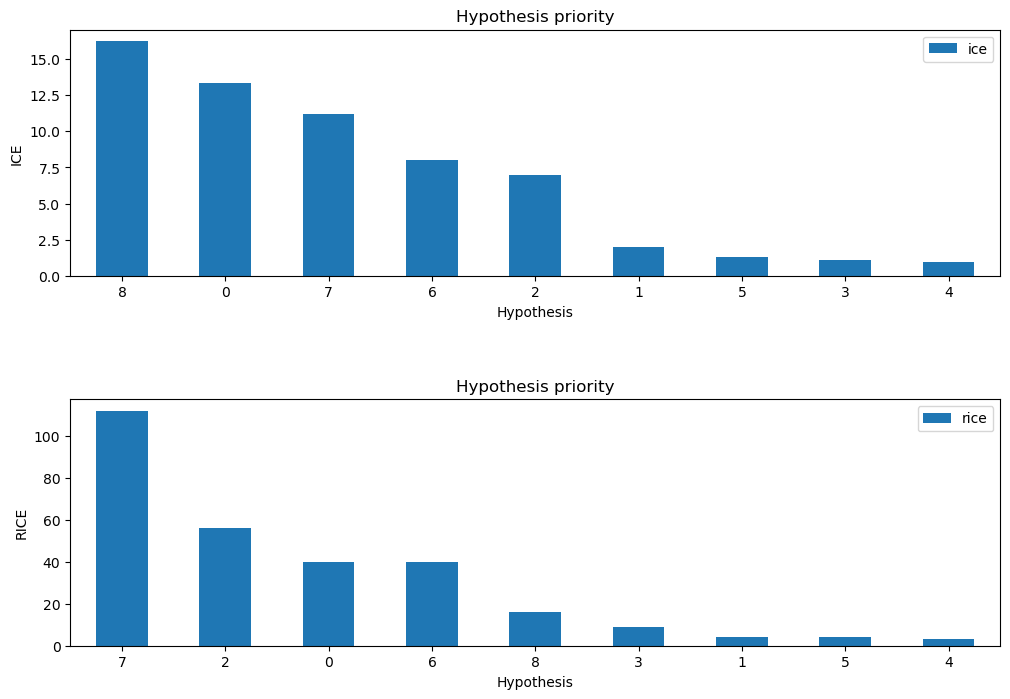

In [27]:
# Chart size 2 rows 1 column
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

# Graph of the rice dataset, row 2 column 1
rice_plot = rice.plot(
    kind='bar',
    ax=axes[1]
)

# Rotate x labels
rice_plot.set_xticklabels(rice_plot.get_xticklabels(), rotation=0) 

# Graph of dataset ice, row 1 column 1
ice_plot = ice.plot(
    kind='bar',
    ax=axes[0]
)

# Rotate x labels
ice_plot.set_xticklabels(ice_plot.get_xticklabels(), rotation=0)

# Naming of subplots
axes[1].set_xlabel('Hypothesis')
axes[1].set_ylabel('RICE')
axes[0].set_xlabel('Hypothesis')
axes[0].set_ylabel('ICE')

# Chart title
axes[1].set_title('Hypothesis priority')
axes[0].set_title('Hypothesis priority')

# Added space between subplots
plt.subplots_adjust(hspace=0.5)

# Displays graphs
plt.show()

In [28]:
# Hypothesis at indexes 0 and 7
print('Hypothesis with index number 0: ', df_hyp['hypothesis'][0])
print('Hypothesis with index number 7: ', df_hyp['hypothesis'][7])

Hypothesis with index number 0:  Add two new channels for attracting traffic. This will bring 30% more users
Hypothesis with index number 7:  Add a subscription form to all the main pages. This will help you compile a mailing list


**Tentative conclusion**

ICE Method:
1. Index numbers 8, 0, and 7 top priority,

RICE method:
1. index numbers 7, 2, and 0 top the hypotheses priority that need to be tested first.

Based on these:
1. Hypothesis 0: "Add two new channels for attracting traffic. This will bring 30% more users"
2. Hypothesis 7: "Add a subscription form to all the main pages. This will help you compile a mailing list"
3. Hypotheses 0 and 7 have a relatively promising position to be tested first

[Back to stages](#back)

### A/B testing analysis <a id="2"></a>

df_orders and df_visits are the results of A/B testing which will then be carried out by the A/B testing analysis process of the dataset.

#### Dataset preparation<a id="2.1"></a>

In [29]:
# Unique pairing groups and dates
datesGroups = df_orders[['date', 'group']].drop_duplicates()

In [30]:
# Implement lambda functions on df_orders
df_orders_agg = datesGroups.apply( 
    # for each x in datesGroups with conditions
    # df_orders, np. logical_and(array1, array2)
    # row, axis=1
    lambda x: df_orders[np.logical_and(
        df_orders['date'] <= x['date'],
        df_orders['group'] == x['group'])].agg({
            'date' : 'max',
            'group' : 'max',
            'transactionid' : pd.Series.nunique,
            'visitorid' : pd.Series.nunique,
            'revenue' : 'sum'
}), axis=1).sort_values(by=['date','group'])

In [31]:
# Implement lambda functions on df_visits
df_visits_agg = datesGroups.apply( 
    # for each x in datesGroups with conditions
    # df_visits, np. logical_and(array1, array2)
    # line, axis=1
    lambda x: df_visits[np.logical_and(
        df_visits['date'] <= x['date'],
        df_visits['group'] == x['group'])].agg({
            'date' : 'max',
            'group' : 'max',
            'visits' : 'sum'
}), axis=1).sort_values(by=['date','group'])

In [32]:
# Combine datasets
report = df_orders_agg.merge(
    df_visits_agg,
    left_on=['date', 'group'],
    right_on=['date', 'group']
)

In [33]:
# Rename column
report.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [34]:
# Sample data
report.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


[Back to stages](#back)

#### Cumulative metric stability analysis process <a id="2.2"></a>

Testing the graph can prevent the occurrence of lurking problems (*peeking problem*).

Peeking problem is the act of drawing conclusions before the experiment is finished, and making decisions based on these conclusions. This can cause bias, given the potential for outlier observations.

A graph of cumulative metrics will help decide whether to continue testing.

##### Cumulative income by group

In [35]:
# Group A
report_cumrev_A = report[report['group']=='A'][['date', 'revenue', 'orders']]

# Group B
report_cumrev_B = report[report['group']=='B'][['date', 'revenue', 'orders']]

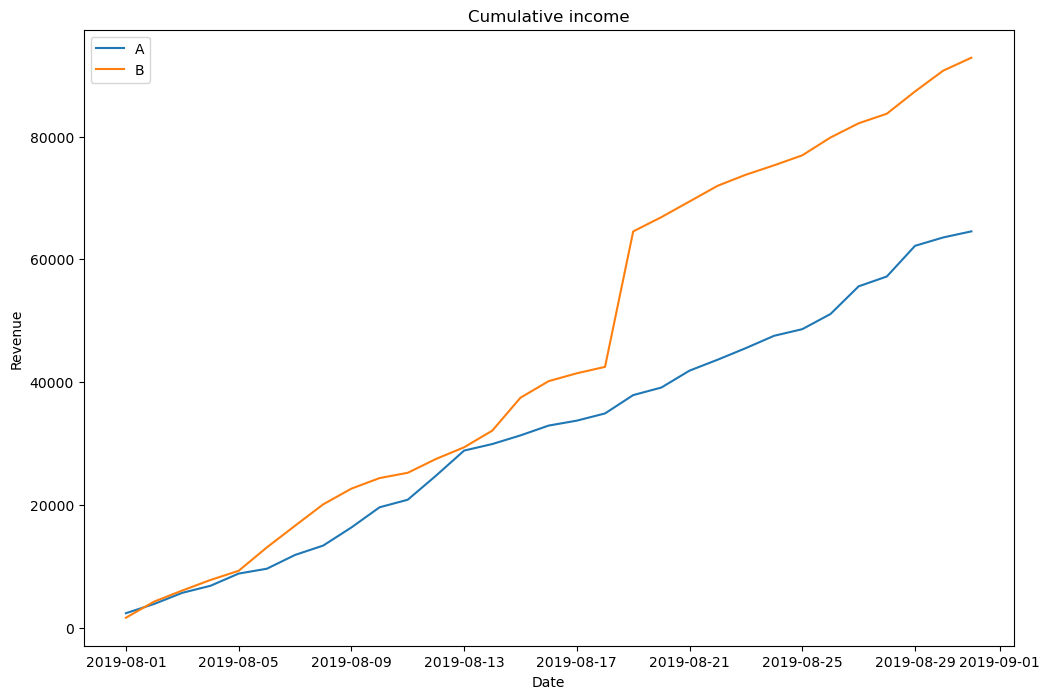

In [36]:
# Size chart
plt.figure(figsize=(12, 8))

# Graph of earnings by day and group
plt.plot(report_cumrev_A['date'], report_cumrev_A['revenue'], label='A')
plt.plot(report_cumrev_B['date'], report_cumrev_B['revenue'], label='B')

# Title
plt.title("Cumulative income")

# Create names on the x,y-axis
plt.xlabel('Date')
plt.ylabel('Revenue')

# Displays graphs and legends
plt.legend()

# Displays the result
plt.show()

Revenue continued to increase during the test, however both groups recorded revenue gains at certain points as happened in group B.

Maybe this is due to very expensive orders or orders in samples.

##### Cumulative average order size by group

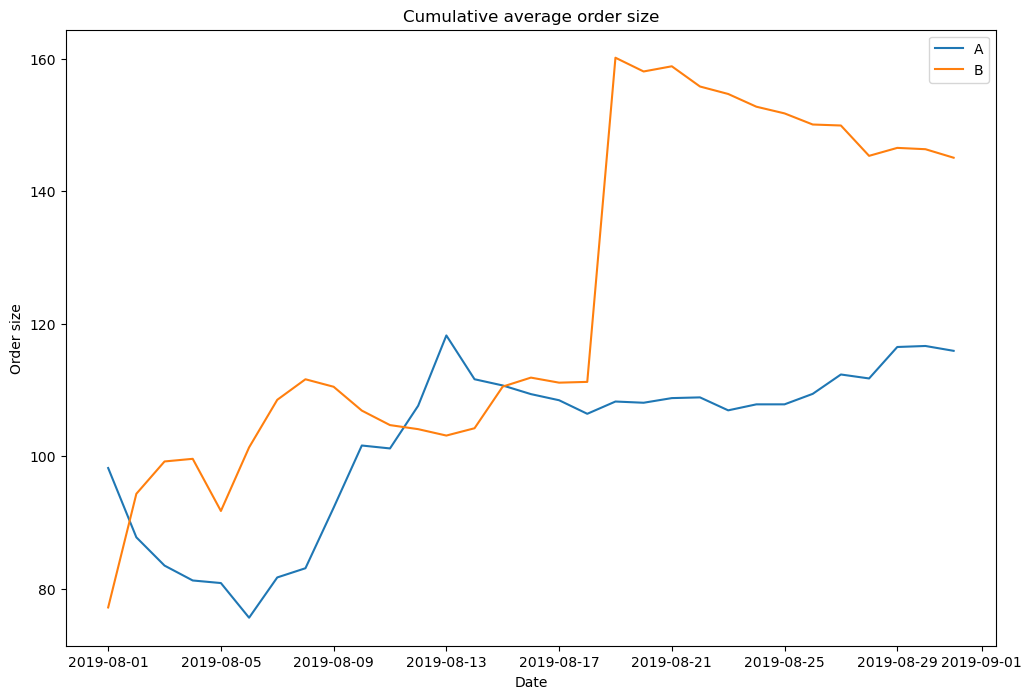

In [37]:
# Size chart
plt.figure(figsize=(12, 8))

# Graph of earnings by day and group
plt.plot(report_cumrev_A['date'], report_cumrev_A['revenue']/report_cumrev_A['orders'], label='A')
plt.plot(report_cumrev_B['date'], report_cumrev_B['revenue']/report_cumrev_B['orders'], label='B')

# Title
plt.title("Cumulative average order size")

# Create names on the x,y-axis
plt.xlabel('Date')
plt.ylabel('Order size')

# Displays graphs and legends
plt.legend()

# Displays the result
plt.show()

In the beginning, the cumulative value still fluctuated, then stabilized towards the end of the test.

There was a big jump around August 17-21 for group B. And around August 5-17 for group A.

This may also be due to a raise in orders or very expensive orders in samples.

##### Relative difference in cumulative average order size of group B compared to group A

In [38]:
# Combine accumulative datasets
report_cumrev_merge = report_cumrev_A.merge(
    report_cumrev_B,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B']
)

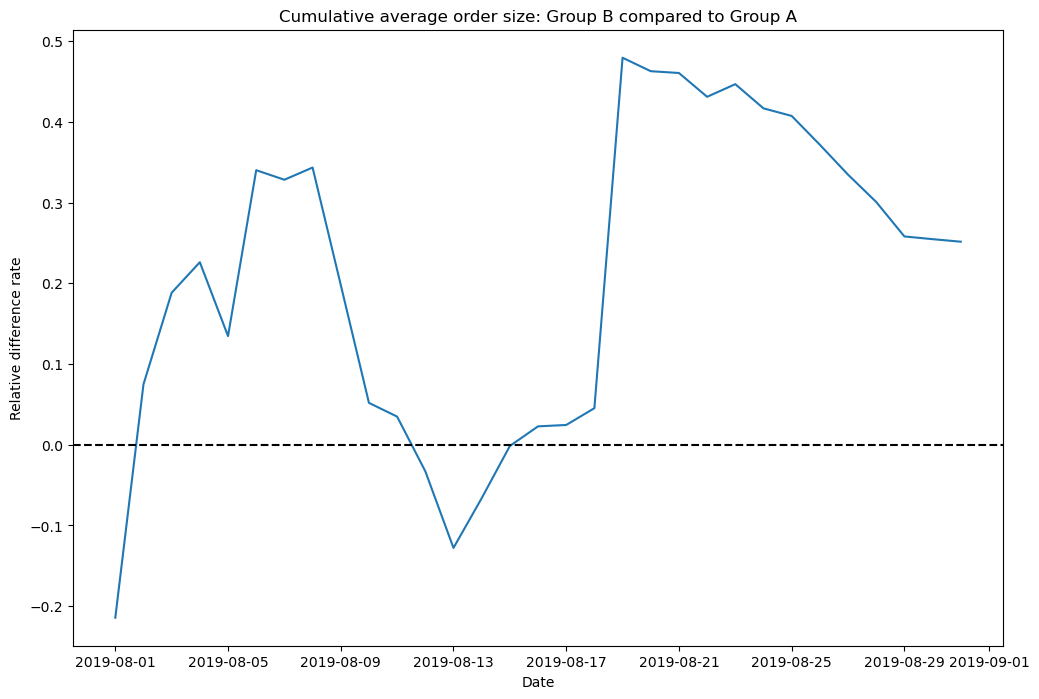

In [39]:
# Size chart
plt.figure(figsize=(12, 8))

# Graph of relative differences for the average order quantity
plt.plot(
    report_cumrev_merge['date'],
    (
        (report_cumrev_merge['revenueB']/report_cumrev_merge['ordersB']) 
        / (report_cumrev_merge['revenueA']/report_cumrev_merge['ordersA'])
    ) - 1
)

# Title
plt.title("Cumulative average order size: Group B compared to Group A")

# Create names on the x,y-axis
plt.xlabel('Date')
plt.ylabel('Relative difference rate')

# Horizontal axis
plt.axhline(y=0, color='black', linestyle='--')

# Displays graphs
plt.show()

At some points the difference increases dramatically, indicating a large order (*outliers*)

##### Conversion rate the ratio of orders to the number of visits each day per group

In [40]:
# Calculates the cumulative ratio
report['conversion'] = report['orders']/report['visitors']

In [41]:
# Group A
report_cumulative_A = report[report['group']=='A']

# Group B
report_cumulative_B = report[report['group']=='B']

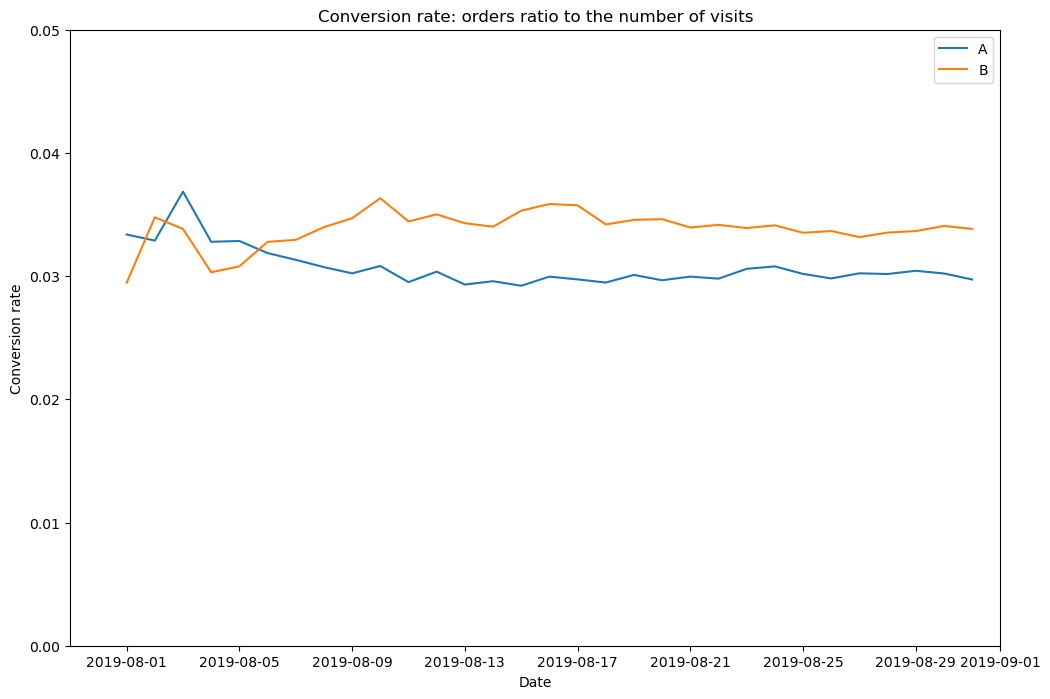

In [42]:
# Size chart
plt.figure(figsize=(12, 8))

# Graph of earnings by day and group
plt.plot(report_cumulative_A['date'], report_cumulative_A['conversion'], label='A')
plt.plot(report_cumulative_B['date'], report_cumulative_B['conversion'], label='B')

# Title
plt.title("Conversion rate: orders ratio to the number of visits")

# Create names on the x,y-axis
plt.xlabel('Date')
plt.ylabel('Conversion rate')

# set the axis scale
plt.axis([pd.to_datetime('2019-07-30'), pd.to_datetime('2019-09-01'), 0, 0.05])

# Displays graphs and legends
plt.legend()
plt.show()

Symmetrical results like this are rarely found in experimental data, the cause could be from code bugs or indicating unreliable data.

But here it is assumed that the dataset is valid and can be trusted.

So following the observation, at the beginning of the test group A had a higher conversion rate than group B, but group B increased periodically and eventually it was higher than group A, both groups fluctuated around the same value before stabilizing.

In [43]:
# Combine accumulative datasets
report_cumconver_merge = report_cumulative_A[['date', 'conversion']].merge(
    report_cumulative_B[['date', 'conversion']],
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B']
)

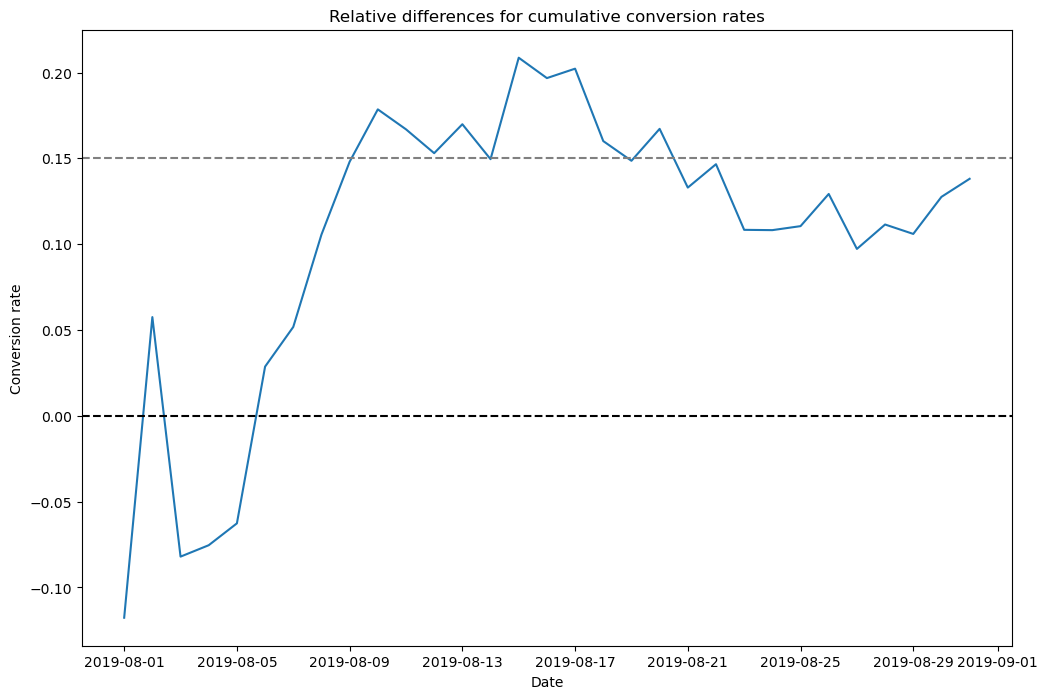

In [44]:
# Size chart
plt.figure(figsize=(12, 8))

# Graph of relative differences for cumulative conversion rates
plt.plot(
    report_cumconver_merge['date'],
    (
        report_cumconver_merge['conversionB']
        /report_cumconver_merge['conversionA']
    ) -1
)

# Title
plt.title("Relative differences for cumulative conversion rates")

# Create names on the x,y-axis
plt.xlabel('Date')
plt.ylabel('Conversion rate')

# set the axis scale
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')

# Displays graphs
plt.show()

Group B continued to improve and stabilized around 15% higher than group A.

[Back to stages](#back)

#### Analyze and fix outliers <a id="2.3"></a>

##### Number of orders per user

In [45]:
# Separate required columns,
# group by `visitorid` column,
# and calculate the number of orders
orders_users = (
    df_orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorid', as_index=False)
    .agg({
        'transactionid' : pd.Series.nunique
    })
)

In [46]:
# Rename column
orders_users.columns = ['visitorid', 'orders']

In [47]:
# Sort data
orders_users.sort_values(by='orders', ascending=False).head(10)

,visitorid,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


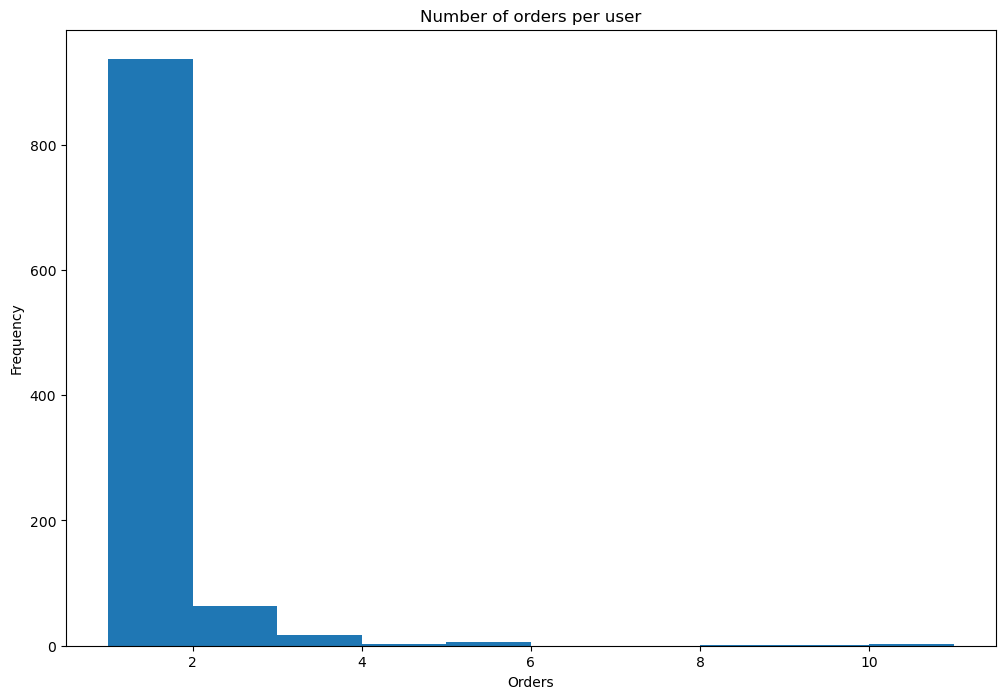

In [48]:
# Size chart
plt.figure(figsize=(12, 8))

# Graphics
plt.hist(orders_users['orders'])

# Title
plt.title("Number of orders per user")

# Create names on the x,y-axis
plt.xlabel('Orders')
plt.ylabel('Frequency')

# Displays graphs
plt.show()

The majority make one order. But most percentage of customers place two to 4 orders.

In [49]:
# Creates x-axis data based on values in the orders_users dataset
x_values = pd.Series(range(0, len(orders_users)))

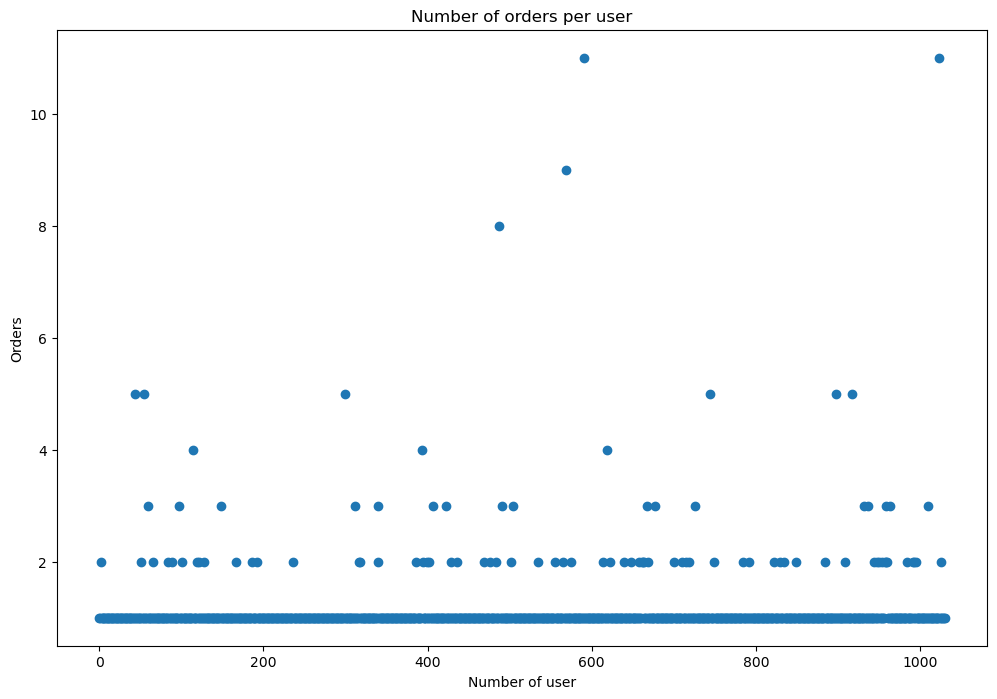

In [50]:
# Size chart
plt.figure(figsize=(12, 8))

# Graphs
plt.scatter(x_values, orders_users['orders'])

# Title
plt.title("Number of orders per user")

# Create names on the x,y-axis
plt.xlabel('Number of user')
plt.ylabel('Orders')

# Displays graphs
plt.show()

With this graph it can be confirmed that there are indeed many users who place orders of two to four orders.

##### 95th and 99th percentile number of orders per user

In [51]:
#95, and 99 percentile of orders per user
np.percentile(orders_users['orders'], [95, 99])

array([2., 4.])

As can be seen the number of orders that made more than two orders did not exceed 5% and those that made four orders did not exceed 10%.

So that it can be determined that users who make more than 2 orders will be considered an anomaly (*outlier*).

##### Total order price

In [52]:
# Sort datasets
df_orders.sort_values(by='revenue', ascending=False).head(10)

,transactionid,visitorid,date,revenue,group
425,590470918,1920142716,2019-08-19,19920.4,B
1196,3936777065,2108080724,2019-08-15,3120.1,B
858,192721366,1316129916,2019-08-27,1450.2,A
1136,666610489,1307669133,2019-08-13,1425.8,A
744,3668308183,888512513,2019-08-27,1335.6,B
662,1811671147,4266935830,2019-08-29,1220.2,A
682,1216533772,4266935830,2019-08-29,1220.2,B
743,3603576309,4133034833,2019-08-09,1050.0,A
1103,1348774318,1164614297,2019-08-12,1025.8,A
1099,316924019,148427295,2019-08-12,1015.9,A


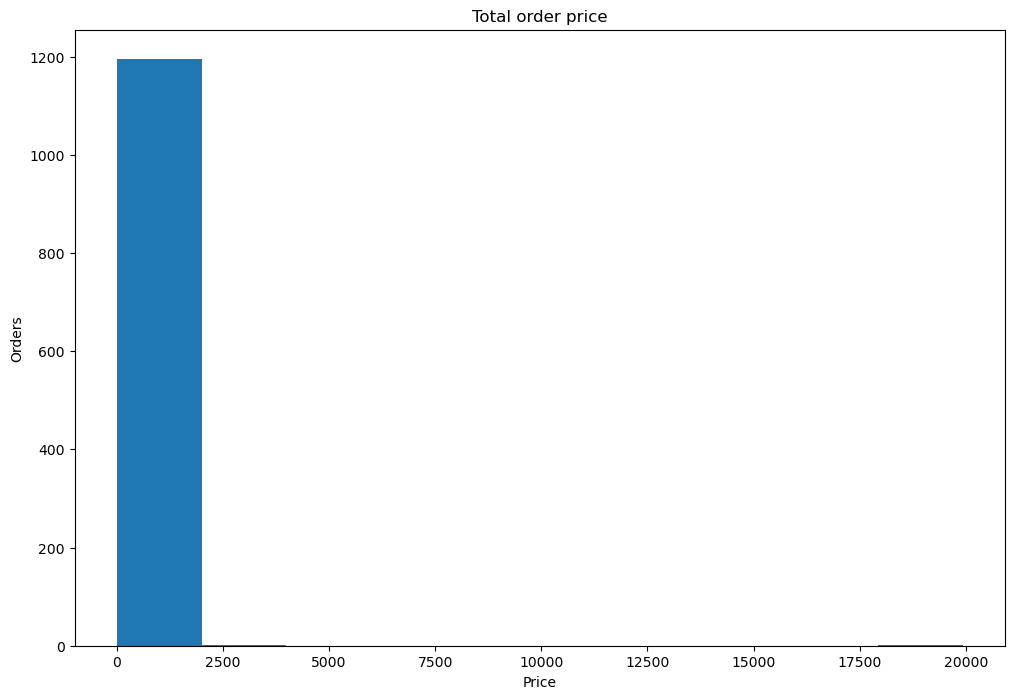

In [53]:
# Size chart
plt.figure(figsize=(12, 8))

# Graphics
plt.hist(df_orders['revenue'])

# Title
plt.title("Total order price")

# Create names on the x,y-axis
plt.xlabel('Price')
plt.ylabel('Orders')

# Displays graphs
plt.show()

The chart shows that there are orders with a total price above 2500 dollars, however most of the orders are smaller.

In [54]:
# Creates x-axis data based on values in the dataset df_orders['revenue']
x_values_orders = pd.Series(range(0, len(df_orders['revenue'])))

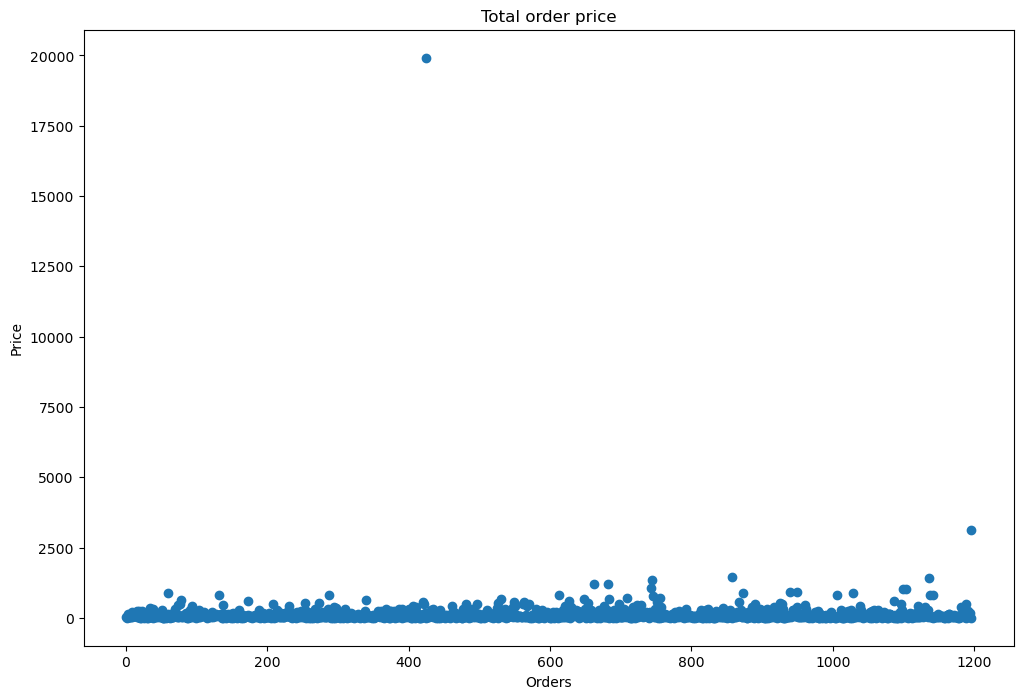

In [55]:
# Size chart
plt.figure(figsize=(12, 8))

# Graphics
plt.scatter(x_values_orders, df_orders['revenue'])

# Title
plt.title("Total order price")

# Create names on the x,y-axis
plt.xlabel('Orders')
plt.ylabel('Price')

# Displays graphs
plt.show()

As you can see there are orders with a large total price.

##### The 95th and 99th percentiles for the total order price

In [56]:
# 95, and 99 percentile of orders per user
np.percentile(df_orders['revenue'], [95, 99])

array([435.54 , 900.904])

As you can see the total price of orders made over 435.54 dollars does not exceed 5% and those made 900.9 dollars orders are not more than 10%.

So that it can be determined that a user who placed an order with a total price of around 435.54 - 900.9 dollars would be considered an anomaly (*outlier*), let's assign more than 500 dollars to this anomaly.

[Back to stages](#back)

## Hypothesis Test <a id="Test"></a>

The hypothesis test this time will use the Mann-Whitney U test to determine the ranking of the two samples in ascending order and compare the ranking of the values that appear in the two samples.

The higher the number of ranking shifts, the higher the probability of a difference in the distributions of the two samples. This makes it possible to infer the presence or absence of differences for any assigned level of significance.

Nonparametric methods are helpful, as they make no guesswork about how the data is distributed. Methods like this are often used when parameters are difficult (or even impossible) to estimate due to too many outliers.

This method has a p-value or probability of occurrence of values and also alpha or error limit used, if the p-value is smaller than alpha then H1 is more proven, and conversely if the p-value is greater than alpha then H0 is more proven.

### Statistical significance of conversion differences between groups (raw data) <a id="h1"></a>

In [57]:
# Number of transactions by group and per user, Group A
orders_A = df_orders[df_orders['group']=='A'].groupby('visitorid',as_index=False).agg({
    'transactionid' : pd.Series.nunique
})

# Number of transactions by group and per user, Group B
orders_B = df_orders[df_orders['group']=='B'].groupby('visitorid',as_index=False).agg({
    'transactionid' : pd.Series.nunique
})

In [58]:
# Rename column
orders_A.columns = ['visitorid', 'orders']
orders_B.columns = ['visitorid', 'orders']

In [59]:
# The number of orders made by users from group A, including zero
sampleA = pd.concat([orders_A['orders'],pd.Series(0, index=np.arange(
    df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_A['orders'])
), name='orders')],axis=0)

# The number of orders made by users from group B, including zero
sampleB = pd.concat([orders_B['orders'],pd.Series(0, index=np.arange(
    df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_B['orders'])
), name='orders')],axis=0)

Before starting hypothesis testing, the null hypothesis (H0) and the alternative hypothesis (H1) must be determined first.
1. H0: There is no difference in conversion between groups.
2. H1: There are differences in conversion between groups.

If H0 defines 'There is no difference' in conversion between groups, then H1 will define the opposite of H0, which tell that 'There is a difference' in conversion between groups.

For now, the alpha used is 5% for all hypothesis tests carried out, why not 1%, or 10%?, Because 5% is a balanced number to avoid type-I errors, or type-II errors.

Type-I error supports the alternative hypothesis (H1) when the null hypothesis (H0) is true, while type-II error does not support the null hypothesis (H0) when the alternative hypothesis (H1) is true.

In [60]:
# Alpha is set at 0.05
alpha = 0.05

# Mann-Whitney U test
results = st.mannwhitneyu(sampleA, sampleB)

# Displays the result
print('p-value:', results.pvalue)

# Displays results based on conditions
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot ignore the null hypothesis') 

p-value: 0.016792355056752608
We reject the null hypothesis


In [61]:
# Relative differences in conversions between groups
round(sampleB.mean()/sampleA.mean()-1, 3)

0.138

As explained above, because the p-value is smaller than alpha, the null hypothesis is rejected, which means there are differences in conversion between groups.

And the relative difference in conversion between groups is 13.8%.

[Back to stages](#back)

### Statistical significance of difference in mean order size between groups (raw data) <a id="h2"></a>

Before starting hypothesis testing, the null hypothesis (H0) and the alternative hypothesis (H1) must be determined first.
1. H0: There is no difference in the average order size between groups.
2. H1: There is a difference in the average order size between groups.

If H0 defines 'There is no difference' in the average order size between groups, then H1 will define the opposite of H0, which tell that 'There is a difference' in the average order size between groups.

In [62]:
 # Alpha is set at 0.05
alpha = 0.05

# Mann-Whitney U test
results = (st.mannwhitneyu(
    df_orders[df_orders['group']=='A']['revenue'],
    df_orders[df_orders['group']=='B']['revenue'])
)

# Displays the result
print('p-value:', results.pvalue)

# Displays results based on conditions
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot ignore the null hypothesis') 

p-value: 0.6915246773264736
We cannot ignore the null hypothesis


In [63]:
# Difference in average order size between groups
round(
    (df_orders[df_orders['group']=='B']['revenue'].mean()/
     df_orders[df_orders['group']=='A']['revenue'].mean()) -1 
, 3)

0.252

As seen, because the p-value is greater than alpha, the null hypothesis cannot be ignored, which means that there is no difference in the average order size between groups.

And the difference in average order size between groups was 25.2%.

[Back to stages](#back)

### Statistical significance of conversion differences between groups (filtered data) <a id="h3"></a>

In [64]:
# Users who made more than 2 orders
users_orders_count = pd.concat([
    orders_A[orders_A['orders'] > 2]['visitorid'],
    orders_B[orders_B['orders'] > 2]['visitorid']],
    axis = 0
)

In [65]:
# Users who spend more than 500000
users_orders_expense = df_orders[df_orders['revenue'] > 50000]['visitorid']

In [66]:
# Merge series columns
abnormal_users = (
    pd.concat([users_orders_count, users_orders_expense],axis = 0)
    .drop_duplicates()
    .sort_values()
)

# Displays the result
abnormal_users.head()

18    199603092
23    237748145
37    249864742
68    457167155
68    611059232
Name: visitorid, dtype: int64

In [67]:
# Dataset size
abnormal_users.shape

(20,)

In [68]:
# Filter sample A
sampleA_filt = pd.concat([orders_A[np.logical_not(orders_A['visitorid'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(
    df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_A['orders'])
),name='orders')],axis=0)


# Filter sample B
sampleB_filt = pd.concat([orders_B[np.logical_not(orders_B['visitorid'].isin(abnormal_users))]['orders'],pd.Series(0, index=np.arange(
    df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_B['orders'])
),name='orders')],axis=0)

Before starting hypothesis testing, the null hypothesis (H0) and the alternative hypothesis (H1) must be determined first.
1. H0: There is no difference in conversion between groups.
2. H1: There are differences in conversion between groups.

If H0 defines 'There is no difference' in conversion between groups, then H1 will define the opposite of H0, which tell that 'There is a difference' in conversion between groups.

In [69]:
# Alpha is set at 0.05
alpha = 0.05

# Mann-Whitney U test
results = st.mannwhitneyu(sampleA_filt, sampleB_filt)

# Displays the result
print('p-value:', results.pvalue)

# Displays results based on conditions
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot ignore the null hypothesis')  

p-value: 0.011549354609175194
We reject the null hypothesis


In [70]:
# Relative difference in conversions between groups after filtering
round(sampleB_filt.mean()/sampleA_filt.mean()-1, 3)

0.17

As seen, because the p-value is smaller than alpha, the null hypothesis is rejected, which means that there are differences in conversion between groups.

And the relative difference in conversion between groups is 17%.

[Back to stages](#back)

### Statistical significance of difference in mean order size between groups (filtered data) <a id="h4"></a>

Before starting hypothesis testing, the null hypothesis (H0) and the alternative hypothesis (H1) must be determined first.
1. H0: There is no difference in the average order size between groups.
2. H1: There is a difference in the average order size between groups.

If H0 defines 'There is no difference' in the average order size between groups, then H1 will define the opposite of H0, which tell that 'There is a difference' in the average order size between groups.

In [71]:
# Alpha is set at 0.05
alpha = 0.05

# Mann-Whitney U test
results = st.mannwhitneyu(
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorid'].isin(abnormal_users)))]['revenue'],
    df_orders[np.logical_and(
        df_orders['group']=='B',
        np.logical_not(df_orders['visitorid'].isin(abnormal_users)))]['revenue'])

# Displays the result
print('p-value:', results.pvalue)

# Displays results based on conditions
if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print('We cannot ignore the null hypothesis') 

p-value: 0.7057054773124258
We cannot ignore the null hypothesis


In [72]:
# Difference in average order size between groups after filtering
round(
    df_orders[np.logical_and(df_orders['group']=='B',np.logical_not(df_orders['visitorid'].isin(abnormal_users)))]['revenue'].mean()/
    df_orders[np.logical_and(
        df_orders['group']=='A',
        np.logical_not(df_orders['visitorid'].isin(abnormal_users)))]['revenue'].mean() - 1, 3)

0.228

As seen, because the p-value is greater than alpha, the null hypothesis cannot be ignored, which means that there is no difference in the average order size between groups.

And the difference in average order size between groups was 22.8%.

**Tentative conclusion**

The following facts are obtained from the results of hypothesis testing:
1. Both the raw and filtered data showed statistically significant differences in conversion between groups
2. Neither the raw data nor the filtered data showed statistically significant differences in average order size between groups
3. The graph showing the difference in conversion between groups shows that the results of group B are better, and do not show a significant increase
4. The graph showing the difference in average order size between groups shows that group B's results are getting better day by day.

**Decision based on test results**

Based on the results of statistical tests, the following possible decisions can be made:

Stopped testing, and considered one of the groups as the leader as shown the probability that group B is better than group A in terms of average order size.

[Back to stages](#back)

## General Conclusion <a id="Conclusion"></a>

After checking the dataset, making improvements and conducting analysis, here are the results:

In the hypothesis priority section:
- Hypotheses 0 and 7 have a relatively promising position to be tested first

Then on hypothesis testing:
- The final decision is to stop testing, and consider group B to be the leader based on the probabilities shown.

[Back to stages](#back)